In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import gabor
from google.colab.patches import cv2_imshow
from skimage.feature import local_binary_pattern

In [ ]:
road_image = cv2.imread('/content/road.jpg')
circle_image = cv2.imread('/content/circle.jpg')

gray_road = cv2.cvtColor(road_image, cv2.COLOR_BGR2GRAY)
gray_circle = cv2.cvtColor(circle_image, cv2.COLOR_BGR2GRAY)

In [ ]:
edges = cv2.Canny(gray_road, 50, 150)

_, thresh = cv2.threshold(gray_road, 128, 255, cv2.THRESH_BINARY)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

line_img = road_image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

circles = cv2.HoughCircles(gray_circle, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)

circle_img = circle_image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 0, 255), 2)
        cv2.circle(circle_img, (i[0], i[1]), 2, (255, 0, 0), 3)

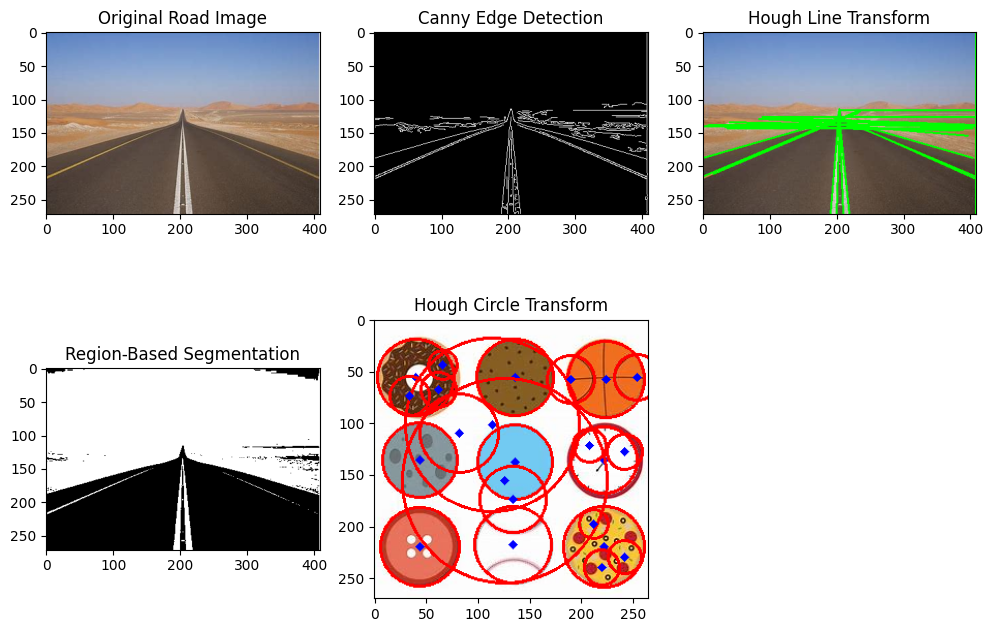

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1), plt.imshow(cv2.cvtColor(road_image, cv2.COLOR_BGR2RGB)), plt.title('Original Road Image')
plt.subplot(2, 3, 2), plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.subplot(2, 3, 3), plt.imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB)), plt.title('Hough Line Transform')
plt.subplot(2, 3, 4), plt.imshow(thresh, cmap='gray'), plt.title('Region-Based Segmentation')
plt.subplot(2, 3, 5), plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB)), plt.title('Hough Circle Transform')
plt.show()

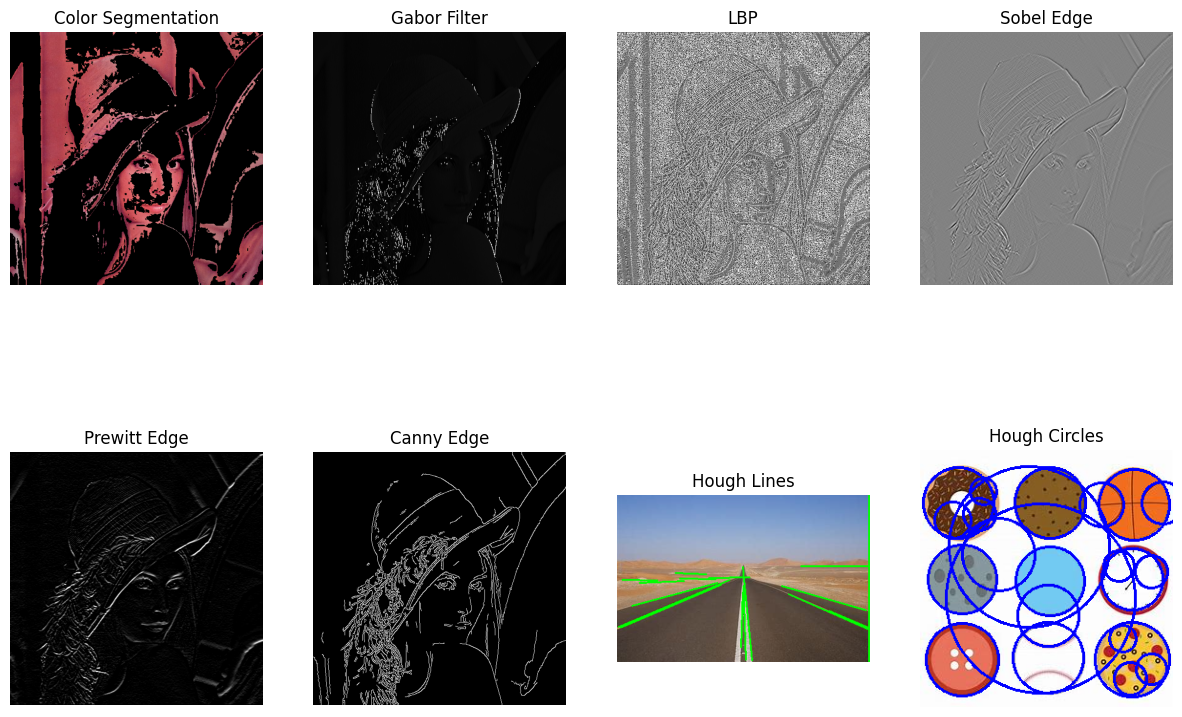

In [ ]:
def color_segmentation(image_path, lower_hsv, upper_hsv):
    image = cv2.imread(image_path)
    image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_hsv, upper_hsv)
    segmented = cv2.bitwise_and(image, image, mask=mask)
    return segmented

def texture_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    gabor_filtered, _ = gabor(image, frequency=0.6)
    lbp = local_binary_pattern(image, P=8, R=1, method="uniform")
    return gabor_filtered, lbp

def edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges_sobel = cv2.Sobel(image, cv2.CV_64F, 1, 1, ksize=5)
    edges_prewitt = cv2.filter2D(image, -1, np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]))
    edges_canny = cv2.Canny(image, 100, 200)
    return edges_sobel, edges_prewitt, edges_canny

def hough_lines(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return image

def hough_circles(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=100)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

    return image

def display_images(images, titles):
    num_images = len(images)
    cols = 4
    rows = (num_images + cols - 1) // cols
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        if len(img.shape) == 2:  # Grayscale images
            plt.imshow(img, cmap='gray')
        else:  # Color images
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.show()

segmented_image = color_segmentation("/content/img1.jpeg", np.array([180, 40, 40]), np.array([190, 255, 255]))
gabor_img, lbp_img = texture_segmentation("/content/img1.jpeg")
sobel, prewitt, canny = edge_detection("/content/img1.jpeg")
hough_lines_img = hough_lines("/content/road.jpg")
hough_circles_img = hough_circles("/content/circle.jpg")
display_images([segmented_image, gabor_img, lbp_img, sobel, prewitt, canny, hough_lines_img, hough_circles_img],
               ["Color Segmentation", "Gabor Filter", "LBP", "Sobel Edge", "Prewitt Edge", "Canny Edge", "Hough Lines", "Hough Circles"])

In [ ]:
image = cv2.imread("/content/img1.jpeg")
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
print(hsv_image[100, 100])

[177 149 183]


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO
yolo = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 70.3MB/s]



0: 448x640 16 cars, 270.2ms
Speed: 8.1ms preprocess, 270.2ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)


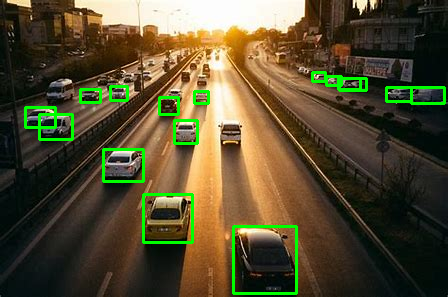

In [ ]:
image_path = "/content/yolo.jpg"
image = cv2.imread(image_path)

results = yolo(image)

# Draw bounding boxes on detected objects
for result in results:
    for box in result.boxes.xyxy:  # Extract bounding box coordinates
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

cv2_imshow(image)

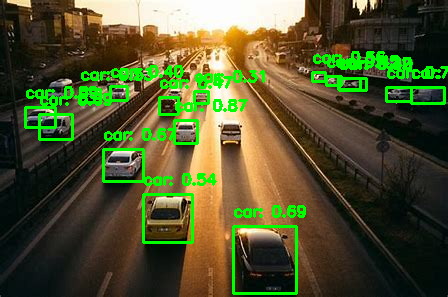

In [ ]:
for result in results:
    for box, conf, cls in zip(result.boxes.xyxy, result.boxes.conf, result.boxes.cls):
        x1, y1, x2, y2 = map(int, box)
        label = f"{yolo.names[int(cls)]}: {conf:.2f}"

        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(image)

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.52M/5.52M [00:00<00:00, 276MB/s]


In [ ]:
# Train the model
results = model.train(data="cifar100", epochs=50, imgsz=32)

Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=classify, mode=train, model=yolo11n-cls.pt, data=cifar100, epochs=50, time=None, patience=100, batch=16, imgsz=32, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_w

100%|██████████| 174M/174M [00:17<00:00, 10.7MB/s]
Unzipping /content/datasets/cifar100.zip to /content/datasets/cifar100...: 100%|██████████| 60203/60203 [00:06<00:00, 9332.72file/s]

Dataset download success ✅ (25.5s), saved to /content/datasets/cifar100



train: /content/datasets/cifar100/train... found 50000 images in 100 classes ✅ 
val: None...
test: /content/datasets/cifar100/test... found 10000 images in 100 classes ✅ 
Overriding model.yaml nc=80 with nc=100

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]     

100%|██████████| 5.35M/5.35M [00:00<00:00, 353MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/cifar100/train... 50000 images, 0 corrupt: 100%|██████████| 50000/50000 [00:06<00:00, 8221.90it/s]


train: New cache created: /content/datasets/cifar100/train.cache


val: Scanning /content/datasets/cifar100/test... 10000 images, 0 corrupt: 100%|██████████| 10000/10000 [00:01<00:00, 7804.17it/s]


val: New cache created: /content/datasets/cifar100/test.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 50 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/50     0.133G      5.275         16         32:   1%|          | 22/3125 [00:01<03:43, 13.86it/s]

       1/50     0.133G      5.294         16         32:   1%|          | 38/3125 [00:03<04:09, 12.37it/s]
100%|██████████| 755k/755k [00:00<00:00, 38.0MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.75it/s]

                   all      0.176      0.447



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 51.11it/s]

                   all      0.184      0.445



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.72it/s]

                   all      0.074      0.239



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.72it/s]

                   all        0.1      0.304



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 44.51it/s]


                   all       0.12      0.343

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.42it/s]


                   all      0.142      0.401

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.49it/s]

                   all      0.177      0.461



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 51.29it/s]

                   all      0.198      0.482



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.25it/s]

                   all      0.227      0.528



      Epoch    GPU_mem       loss  Instances       Size


      10/50     0.189G      3.681         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.31it/s]

                   all      0.242      0.547



      Epoch    GPU_mem       loss  Instances       Size


      11/50     0.197G      3.646         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.11it/s]

                   all      0.251      0.561

      Epoch    GPU_mem       loss  Instances       Size



      12/50     0.203G      3.621         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.37it/s]

                   all      0.263      0.575



      Epoch    GPU_mem       loss  Instances       Size


      13/50     0.209G      3.586         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.88it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.18it/s]

                   all      0.272      0.592



      Epoch    GPU_mem       loss  Instances       Size


      14/50     0.215G      3.537         16         32: 100%|██████████| 3125/3125 [02:30<00:00, 20.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 44.96it/s]

                   all      0.293      0.603



      Epoch    GPU_mem       loss  Instances       Size


      15/50     0.223G      3.504         16         32: 100%|██████████| 3125/3125 [02:31<00:00, 20.63it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.83it/s]

                   all       0.29      0.603



      Epoch    GPU_mem       loss  Instances       Size


      16/50     0.229G      3.499         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.38it/s]

                   all      0.292      0.607



      Epoch    GPU_mem       loss  Instances       Size


      17/50     0.234G      3.466         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.96it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.28it/s]

                   all      0.297      0.615



      Epoch    GPU_mem       loss  Instances       Size


      18/50      0.24G      3.405         16         32: 100%|██████████| 3125/3125 [02:27<00:00, 21.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.01it/s]

                   all      0.302      0.626



      Epoch    GPU_mem       loss  Instances       Size


      19/50     0.246G       3.37         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.10it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.14it/s]

                   all      0.305      0.631



      Epoch    GPU_mem       loss  Instances       Size


      20/50     0.254G      3.336         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.87it/s]

                   all      0.307      0.637



      Epoch    GPU_mem       loss  Instances       Size


      21/50      0.26G      3.296         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.20it/s]

                   all      0.312       0.64



      Epoch    GPU_mem       loss  Instances       Size


      22/50     0.266G      3.276         16         32: 100%|██████████| 3125/3125 [02:31<00:00, 20.57it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.83it/s]

                   all      0.316      0.642



      Epoch    GPU_mem       loss  Instances       Size


      23/50     0.271G      3.243         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.89it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.48it/s]

                   all      0.319      0.645



      Epoch    GPU_mem       loss  Instances       Size


      24/50     0.277G      3.243         16         32: 100%|██████████| 3125/3125 [02:31<00:00, 20.62it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 48.64it/s]

                   all      0.322      0.648



      Epoch    GPU_mem       loss  Instances       Size


      25/50     0.285G      3.235         16         32: 100%|██████████| 3125/3125 [02:27<00:00, 21.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.52it/s]

                   all      0.326      0.653



      Epoch    GPU_mem       loss  Instances       Size


      26/50     0.291G        3.2         16         32: 100%|██████████| 3125/3125 [02:27<00:00, 21.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.96it/s]

                   all      0.327      0.658



      Epoch    GPU_mem       loss  Instances       Size


      27/50     0.297G      3.158         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.42it/s]

                   all      0.333      0.662



      Epoch    GPU_mem       loss  Instances       Size


      28/50     0.303G      3.148         16         32: 100%|██████████| 3125/3125 [02:26<00:00, 21.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.66it/s]

                   all      0.336      0.666



      Epoch    GPU_mem       loss  Instances       Size


      29/50     0.311G      3.106         16         32: 100%|██████████| 3125/3125 [02:30<00:00, 20.71it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.33it/s]


                   all       0.34      0.668

      Epoch    GPU_mem       loss  Instances       Size


      30/50     0.316G      3.081         16         32: 100%|██████████| 3125/3125 [02:34<00:00, 20.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 49.26it/s]


                   all      0.344      0.671

      Epoch    GPU_mem       loss  Instances       Size


      31/50     0.322G      3.062         16         32: 100%|██████████| 3125/3125 [02:33<00:00, 20.37it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.71it/s]

                   all      0.349      0.676



      Epoch    GPU_mem       loss  Instances       Size


      32/50     0.328G      3.036         16         32: 100%|██████████| 3125/3125 [02:30<00:00, 20.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 44.54it/s]

                   all      0.355       0.68



      Epoch    GPU_mem       loss  Instances       Size


      33/50     0.334G      3.023         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.87it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 54.20it/s]


                   all      0.356      0.681

      Epoch    GPU_mem       loss  Instances       Size


      34/50     0.342G       3.03         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.07it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.21it/s]

                   all      0.361      0.683



      Epoch    GPU_mem       loss  Instances       Size


      35/50     0.348G      3.029         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.57it/s]


                   all      0.362      0.687

      Epoch    GPU_mem       loss  Instances       Size


      36/50     0.354G      3.007         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 20.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 54.46it/s]

                   all      0.366       0.69



      Epoch    GPU_mem       loss  Instances       Size


      37/50     0.359G       2.97         16         32: 100%|██████████| 3125/3125 [02:30<00:00, 20.82it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:07<00:00, 40.87it/s]

                   all      0.369      0.693



      Epoch    GPU_mem       loss  Instances       Size


      38/50     0.367G       2.95         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.93it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 54.19it/s]

                   all      0.372      0.694



      Epoch    GPU_mem       loss  Instances       Size


      39/50     0.373G      2.935         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.08it/s]

                   all      0.374      0.697



      Epoch    GPU_mem       loss  Instances       Size


      40/50     0.379G      2.901         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 20.98it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.39it/s]

                   all      0.378      0.698



      Epoch    GPU_mem       loss  Instances       Size


      41/50     0.385G      2.886         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.85it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 47.85it/s]

                   all       0.38      0.701



      Epoch    GPU_mem       loss  Instances       Size


      42/50     0.391G      2.872         16         32: 100%|██████████| 3125/3125 [02:30<00:00, 20.77it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.48it/s]

                   all      0.383      0.704



      Epoch    GPU_mem       loss  Instances       Size


      43/50     0.398G      2.847         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.92it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 51.02it/s]


                   all      0.386      0.706

      Epoch    GPU_mem       loss  Instances       Size


      44/50     0.404G      2.837         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 45.33it/s]

                   all      0.389      0.708



      Epoch    GPU_mem       loss  Instances       Size


      45/50      0.41G      2.803         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.00it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.73it/s]

                   all      0.391      0.711



      Epoch    GPU_mem       loss  Instances       Size


      46/50     0.416G      2.779         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.75it/s]

                   all      0.394      0.715



      Epoch    GPU_mem       loss  Instances       Size


      47/50     0.424G      2.762         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 50.20it/s]

                   all      0.396      0.715



      Epoch    GPU_mem       loss  Instances       Size


      48/50      0.43G       2.73         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.95it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.95it/s]

                   all      0.398      0.717



      Epoch    GPU_mem       loss  Instances       Size


      49/50     0.436G      2.741         16         32: 100%|██████████| 3125/3125 [02:29<00:00, 20.84it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:06<00:00, 46.08it/s]

                   all        0.4      0.718



      Epoch    GPU_mem       loss  Instances       Size


      50/50     0.441G      2.708         16         32: 100%|██████████| 3125/3125 [02:28<00:00, 21.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 53.10it/s]

                   all      0.402       0.72



50 epochs completed in 2.174 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.4MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.4MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.99 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,654,124 parameters, 0 gradients, 3.3 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/cifar100/train... found 50000 images in 100 classes ✅ 
val: /content/datasets/cifar100/test... found 10000 images in 100 classes ✅ 
test: /content/datasets/cifar100/test... found 10000 images in 100 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 313/313 [00:05<00:00, 52.74it/s]


                   all      0.402       0.72
Speed: 0.0ms preprocess, 0.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train
